# Exploratory Data Analysis of NOAA Lightning Strike Data

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
import plotly.express as px

## 1. Structuring data

### Objective

We will be examining lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2018. The dataset includes three columns:  

|date|number_of_strikes|center_point_geom|
|---|---|---|

We will:
 
* Find the locations with the greatest number of strikes within a single day
* Examine the locations that had the greatest number of days with at least one lightning strike 
* Determine whether certain days of the week had more lightning strikes than others  
* Add data from 2016 and 2017 and, for each month, calculate the percentage of total lightning strikes for that year that occurred in that month
* Plot this data on a bar graph

In [2]:
# Read in the 2018 dataset
df = pd.read_csv('noaa_lightning_structuring_dataset1.csv') 
df.head()

date  number_of_strikes center_point_geom
0  2018-01-03                194     POINT(-75 27)
1  2018-01-03                 41   POINT(-78.4 29)
2  2018-01-03                 33   POINT(-73.9 27)
3  2018-01-03                 38   POINT(-73.8 27)
4  2018-01-03                 92     POINT(-79 28)

In [3]:
# Display the data types of the columns
print(df.dtypes)

date                 object
number_of_strikes     int64
center_point_geom    object
dtype: object


The `date` column is currently a string. Let's parse it into a `datetime` column.

In [4]:
# Convert the `date` column to `datetime`.
df['date'] = pd.to_datetime(df['date']) 

In [5]:
df.shape

(3401012, 3)

In [6]:
df.drop_duplicates().shape

(3401012, 3)

The shape of the dataset after dropping duplicates is the same, so you can assume there are no duplicates. Hence, there is at most one row per date, per area, and per number of strikes.

#### Locations with most strikes in a single day

In [7]:
# Sort by number of strikes in descending order
df.sort_values(by='number_of_strikes', ascending=False).head(10)

date  number_of_strikes  center_point_geom
302758 2018-08-20               2211  POINT(-92.5 35.5)
278383 2018-08-16               2142  POINT(-96.1 36.1)
280830 2018-08-17               2061  POINT(-90.2 36.1)
280453 2018-08-17               2031  POINT(-89.9 35.9)
278382 2018-08-16               1902  POINT(-96.2 36.1)
11517  2018-02-10               1899  POINT(-95.5 28.1)
277506 2018-08-16               1878  POINT(-89.7 31.5)
24906  2018-02-25               1833  POINT(-98.7 28.9)
284320 2018-08-17               1767    POINT(-90.1 36)
24825  2018-02-25               1741      POINT(-98 29)

#### Locations with most days with at least one lightning strike

In [8]:
# Identify the locations that appear most in the dataset
df.center_point_geom.value_counts()

center_point_geom
POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.5 22.9)     107
POINT(-82.7 22.9)     107
POINT(-82.5 22.8)     106
                     ... 
POINT(-119.3 35.1)      1
POINT(-119.3 35)        1
POINT(-119.6 35.6)      1
POINT(-119.4 35.6)      1
POINT(-58.5 45.3)       1
Name: count, Length: 170855, dtype: int64

The locations with the most days with lightning strikes had at least one strike on 108 days—nearly one out of every three days of the year. These locations are all rather close to each other geographically.

In [9]:
# Identify the top 20 locations with most days of lightning
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

#### Lightning strikes by day of week

In [10]:
# Create two new columns
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

date  number_of_strikes center_point_geom  week    weekday
0 2018-01-03                194     POINT(-75 27)     1  Wednesday
1 2018-01-03                 41   POINT(-78.4 29)     1  Wednesday
2 2018-01-03                 33   POINT(-73.9 27)     1  Wednesday
3 2018-01-03                 38   POINT(-73.8 27)     1  Wednesday
4 2018-01-03                 92     POINT(-79 28)     1  Wednesday

In [11]:
# Calculate the mean count of lightning strikes for each weekday
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

number_of_strikes
weekday                     
Friday             13.349972
Monday             13.152804
Saturday           12.732694
Sunday             12.324717
Thursday           13.240594
Tuesday            13.813599
Wednesday          13.224568

It seems that Saturday and Sunday have fewer lightning strikes on average than the other five weekdays. We will plot the distributions of the strike counts for each day of the week. We want each distribution to be represented as a boxplot. 

In [12]:
# Define order of days for the plot
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

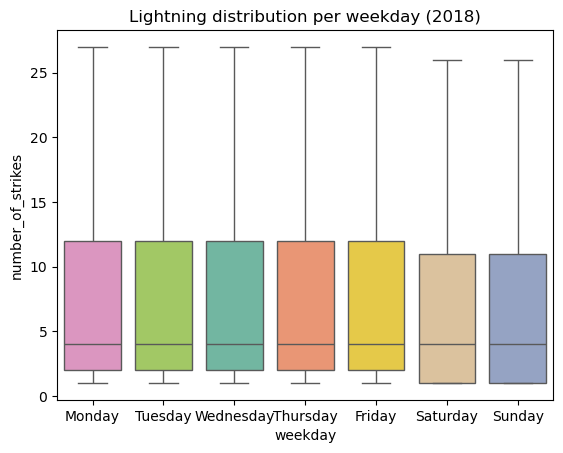

In [13]:
# Create boxplots of strike counts for each day of week
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order,
            hue='weekday',
            palette='Set2',
            showfliers=False,
            legend=False
            );
g.set_title('Lightning distribution per weekday (2018)');

Notice that the median remains the same on all of the days of the week. As for Saturday and Sunday, however, the distributions are *both* lower than they are during the rest of the week. We also know that the mean numbers of strikes that occurred on Saturday and Sunday were lower than on the other weekdays. Why might this be? Perhaps the aerosol particles emitted by factories and vehicles increase the likelihood of lightning strikes. In the U.S., Saturday and Sunday are days that many people don't work, so there may be fewer factories operating and fewer cars on the road. This is only speculation, but it's one possible path for further exploration. 

#### Monthly lightning strikes 2016–2018

Finally, we will examine monthly lightning strike data from 2016–2018. We will calculate the percentage of total lightning strikes for each year that occurred in a given month. We will then plot this data on a bar graph.

In [14]:
# Read in the 2016-2017 dataset
df_2 = pd.read_csv('noaa_lightning_structuring_dataset2.csv') 
df_2.head()

date  number_of_strikes  center_point_geom
0  2016-01-04                 55  POINT(-83.2 21.1)
1  2016-01-04                 33  POINT(-83.1 21.1)
2  2016-01-05                 46  POINT(-77.5 22.1)
3  2016-01-05                 28  POINT(-76.8 22.3)
4  2016-01-05                 28    POINT(-77 22.1)

The data is in the same format as the 2018 data when we imported it previously. Now, we will convert the `date` column to `datetime`.

In [15]:
# Convert `date` column to `datetime`
df_2['date'] = pd.to_datetime(df_2['date'])

In [16]:
# Create a new dataframe combining 2016–2017 data with 2018 data
union_df = pd.concat([df.drop(['weekday','week'],axis=1), df_2], ignore_index=True)
union_df.head()

date  number_of_strikes center_point_geom
0 2018-01-03                194     POINT(-75 27)
1 2018-01-03                 41   POINT(-78.4 29)
2 2018-01-03                 33   POINT(-73.9 27)
3 2018-01-03                 38   POINT(-73.8 27)
4 2018-01-03                 92     POINT(-79 28)

To help us name the bars of the bar plot, we will create three new columns that isolate the year, month number, and month name. 

In [17]:
# Add 3 new columns
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

date  number_of_strikes center_point_geom  year  month month_txt
0 2018-01-03                194     POINT(-75 27)  2018      1   January
1 2018-01-03                 41   POINT(-78.4 29)  2018      1   January
2 2018-01-03                 33   POINT(-73.9 27)  2018      1   January
3 2018-01-03                 38   POINT(-73.8 27)  2018      1   January
4 2018-01-03                 92     POINT(-79 28)  2018      1   January

In [18]:
# Calculate total number of strikes per year
union_df[['year','number_of_strikes']].groupby(['year']).sum()

number_of_strikes
year                   
2016           41582229
2017           35095195
2018           44600989

In [19]:
# Calculate total lightning strikes for each month of each year.
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc='sum')
    ).reset_index()

lightning_by_month.head()

month_txt  year  number_of_strikes
0     April  2016            2636427
1     April  2017            3819075
2     April  2018            1524339
3    August  2016            7250442
4    August  2017            6021702

In [20]:
# Calculate total lightning strikes for each year (again)
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc='sum')
).reset_index()

lightning_by_year.head()

year  year_strikes
0  2016      41582229
1  2017      35095195
2  2018      44600989

In [21]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

month_txt  year  number_of_strikes  year_strikes
0     April  2016            2636427      41582229
1     April  2017            3819075      35095195
2     April  2018            1524339      44600989
3    August  2016            7250442      41582229
4    August  2017            6021702      35095195

In [22]:
# Create new `percentage_lightning_per_month` column
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

month_txt  year  number_of_strikes  year_strikes  \
0     April  2016            2636427      41582229   
1     April  2017            3819075      35095195   
2     April  2018            1524339      44600989   
3    August  2016            7250442      41582229   
4    August  2017            6021702      35095195   

   percentage_lightning_per_month  
0                        6.340273  
1                       10.882045  
2                        3.417725  
3                       17.436396  
4                       17.158195

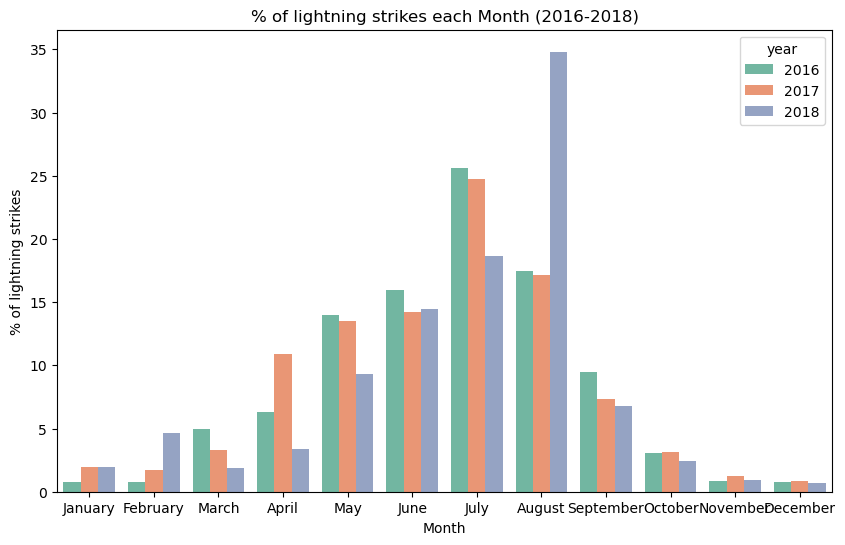

In [23]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data=percentage_lightning,
    x='month_txt',
    y='percentage_lightning_per_month',
    hue='year',
    order=month_order,
    palette='Set2' 
    );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");

For all three years, there is a clear pattern over the course of each year. One month stands out: August. More than one third of the lightning strikes in 2018 happened in August. 

## 2. Working with missing data

### Objective

We will be examining lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the month of August 2018. There are two datasets. The first includes five columns:  

|date|center_point_geom|longitude|latitude|number_of_strikes|
|---|---|---|---|---|

The second dataset contains seven columns:

|date|zip_code|city|state|state_code|center_point_geom|number_of_strikes|
|---|---|---|---|---|---|---|  

The first dataset has two unique colums: `longitude` and `latitude`.  
The second dataset has four unique columns: `zip_code`, `city`, `state`, and `state_code`.  
There are three columns that are common between them: `date`, `center_point_geom`, and `number_of_strikes`.

We want to combine the two datasets into a single dataframe that has all of the information from both datasets. Ideally, both datasets will have the same number of entries for the same locations on the same dates. If they don't, we'll investigate which data is missing.

In [24]:
# Read in first dataset
df = pd.read_csv('noaa_lightning_missing_dataset1.csv')
df.head()

date  center_point_geom  longitude  latitude  number_of_strikes
0  2018-08-01  POINT(-81.6 22.6)      -81.6      22.6                 48
1  2018-08-01  POINT(-81.1 22.6)      -81.1      22.6                 32
2  2018-08-01  POINT(-80.9 22.6)      -80.9      22.6                118
3  2018-08-01  POINT(-80.8 22.6)      -80.8      22.6                 69
4  2018-08-01  POINT(-98.4 22.8)      -98.4      22.8                 44

In [25]:
df.shape

(717530, 5)

In [26]:
# Read in second dataset
df_zip = pd.read_csv('noaa_lightning_missing_dataset2.csv')
df_zip.head()

date  zip_code                                 city          state  \
0  2018-08-08      3281                                Weare  New Hampshire   
1  2018-08-14      6488                 Heritage Village CDP    Connecticut   
2  2018-08-16     97759  Sisters city, Black Butte Ranch CDP         Oregon   
3  2018-08-18      6776                      New Milford CDP    Connecticut   
4  2018-08-08      1077                            Southwick  Massachusetts   

  state_code   center_point_geom  number_of_strikes  
0         NH   POINT(-71.7 43.1)                  1  
1         CT   POINT(-73.2 41.5)                  3  
2         OR  POINT(-121.4 44.3)                  3  
3         CT   POINT(-73.4 41.6)                 48  
4         MA     POINT(-72.8 42)                  2

In [27]:
df_zip.shape

(323700, 7)

Hmmm... This dataset has less than half the number of rows as the first one. But which ones are they?

In [28]:
# Left-join the two datasets
df_joined = df.merge(df_zip, how='left', on=['date','center_point_geom'])

In [29]:
# Print the first 5 rows of the merged data
df_joined.head()

date  center_point_geom  longitude  latitude  number_of_strikes_x  \
0  2018-08-01  POINT(-81.6 22.6)      -81.6      22.6                   48   
1  2018-08-01  POINT(-81.1 22.6)      -81.1      22.6                   32   
2  2018-08-01  POINT(-80.9 22.6)      -80.9      22.6                  118   
3  2018-08-01  POINT(-80.8 22.6)      -80.8      22.6                   69   
4  2018-08-01  POINT(-98.4 22.8)      -98.4      22.8                   44   

   zip_code city state state_code  number_of_strikes_y  
0       NaN  NaN   NaN        NaN                  NaN  
1       NaN  NaN   NaN        NaN                  NaN  
2       NaN  NaN   NaN        NaN                  NaN  
3       NaN  NaN   NaN        NaN                  NaN  
4       NaN  NaN   NaN        NaN                  NaN

In [30]:
# Get descriptive statistics of the joined dataframe
df_joined.describe()

longitude       latitude  number_of_strikes_x       zip_code  \
count  717530.000000  717530.000000        717530.000000  323700.000000   
mean      -90.875445      33.328572            21.637081   57931.958996   
std        13.648429       7.938831            48.029525   22277.327411   
min      -133.900000      16.600000             1.000000    1002.000000   
25%      -102.800000      26.900000             3.000000   38260.750000   
50%       -90.300000      33.200000             6.000000   59212.500000   
75%       -80.900000      39.400000            21.000000   78642.000000   
max       -43.800000      51.700000          2211.000000   99402.000000   

       number_of_strikes_y  
count        323700.000000  
mean             25.410587  
std              57.421824  
min               1.000000  
25%               3.000000  
50%               8.000000  
75%              24.000000  
max            2211.000000

The count information confirms that the new dataframe is missing some data. 

In [31]:
# Create a new df of just the rows that are missing data
df_null_geo = df_joined[pd.isnull(df_joined.state_code)]
df_null_geo.shape

(393830, 10)

We can confirm that `df_null_geo` contains only the rows with the missing `state_code` values by using the `info()` method on `df_joined` and comparing. 

In [32]:
# Get non-null counts on merged dataframe
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717530 entries, 0 to 717529
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 717530 non-null  object 
 1   center_point_geom    717530 non-null  object 
 2   longitude            717530 non-null  float64
 3   latitude             717530 non-null  float64
 4   number_of_strikes_x  717530 non-null  int64  
 5   zip_code             323700 non-null  float64
 6   city                 323700 non-null  object 
 7   state                323700 non-null  object 
 8   state_code           323700 non-null  object 
 9   number_of_strikes_y  323700 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 54.7+ MB


If we subtract the 323,700 non-null rows in columns 5-9 of `df_joined` from the 717,530 non-null rows in columns 0-4 of `df_joined`, we're left with 393,830 rows that contain missing data&mdash;the same number of rows contained in `df_null_geo`.

In [33]:
# Print the first 5 rows
df_null_geo.head()

date  center_point_geom  longitude  latitude  number_of_strikes_x  \
0  2018-08-01  POINT(-81.6 22.6)      -81.6      22.6                   48   
1  2018-08-01  POINT(-81.1 22.6)      -81.1      22.6                   32   
2  2018-08-01  POINT(-80.9 22.6)      -80.9      22.6                  118   
3  2018-08-01  POINT(-80.8 22.6)      -80.8      22.6                   69   
4  2018-08-01  POINT(-98.4 22.8)      -98.4      22.8                   44   

   zip_code city state state_code  number_of_strikes_y  
0       NaN  NaN   NaN        NaN                  NaN  
1       NaN  NaN   NaN        NaN                  NaN  
2       NaN  NaN   NaN        NaN                  NaN  
3       NaN  NaN   NaN        NaN                  NaN  
4       NaN  NaN   NaN        NaN                  NaN

Now that we've merged all of our data together and isolated the rows with missing data, we can better understand what data is missing by plotting the longitude and latitude of locations that are missing city, state, and zip code data.

In [34]:
# Create new df of just latitude, longitude, and number of strikes and group by latitude and longitude
top_missing = df_null_geo[['latitude','longitude','number_of_strikes_x']
            ].groupby(['latitude','longitude']
                      ).sum().sort_values('number_of_strikes_x',ascending=False).reset_index()
top_missing.head(10)

latitude  longitude  number_of_strikes_x
0      22.4      -84.2                 3841
1      22.9      -82.9                 3184
2      22.4      -84.3                 2999
3      22.9      -83.0                 2754
4      22.5      -84.1                 2746
5      22.5      -84.2                 2738
6      22.3      -81.0                 2680
7      22.9      -82.4                 2652
8      22.9      -82.3                 2618
9      22.3      -84.3                 2551

In [35]:
# Reduce size of db otherwise it could break
fig = px.scatter_geo(top_missing[top_missing.number_of_strikes_x>=300],  # Input Pandas DataFrame
                    lat="latitude",  # DataFrame column with latitude
                    lon="longitude",  # DataFrame column with latitude
                    size="number_of_strikes_x") # Set to plot size as number of strikes
fig.update_layout(
    title_text = 'Missing data', # Create a Title
)

fig.show()

Let’s scale it down to only the geographic area we are interested in - the United States.

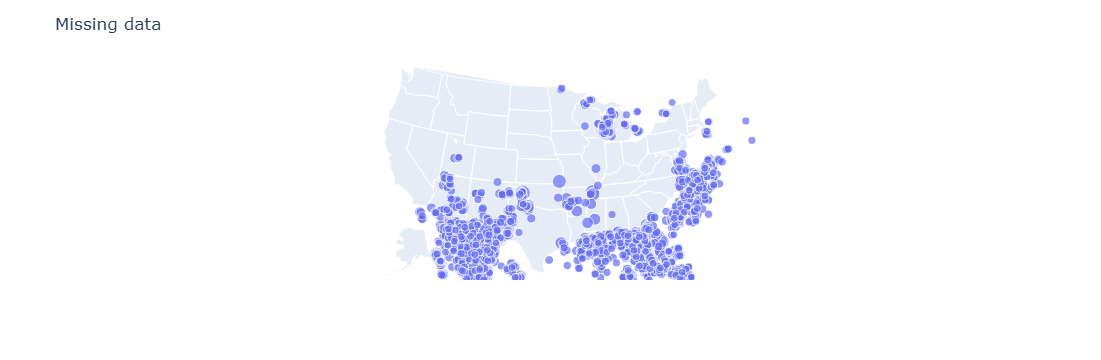

In [36]:
fig = px.scatter_geo(top_missing[top_missing.number_of_strikes_x>=300],  # Input Pandas DataFrame
                    lat="latitude",  # DataFrame column with latitude
                    lon="longitude",  # DataFrame column with latitude
                    size="number_of_strikes_x") # Set to plot size as number of strikes
fig.update_layout(
    title_text = 'Missing data', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

fig.show()

This explains why so many rows were missing state and zip code data! Most of these lightning strikes occurred over water&mdash;the Atlantic Ocean, the Sea of Cortez, the Gulf of Mexico, the Caribbean Sea, and the Great Lakes. Of the strikes that occurred over land, most of those were in Mexico, the Bahamas, and Cuba&mdash;places outside of the U.S. and without U.S. zip codes. Nonetheless, some of the missing data is from Florida and elsewhere within the United States, and we might want to ask the database owner about this.

Therefore, in `df_joined`, for rows where lightning strikes happened over water, we can confidently fill in their missing state and zip code information with "dummy" values and drop the `number_of_strikes_y` column, while for the ones that happened over land in the U.S. we should contact the database owner for clarification.

## 3. Identify and deal with outliers

### Objective

We will be examining lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) from 1987 through 2020. Because this would be many millions of rows to read into the notebook, we've preprocessed the data so it contains just the year and the number of strikes.

We will examine the range of total lightning strike counts for each year and identify outliers. Then we will plot the yearly totals on a scatterplot.

In [37]:
# Read in the dataset
df = pd.read_csv('noaa_lightning_outliers_dataset.csv')
df.head(10)

year  number_of_strikes
0  2020           15620068
1  2019             209166
2  2018           44600989
3  2017           35095195
4  2016           41582229
5  2015           37894191
6  2014           34919173
7  2013           27600898
8  2012           28807552
9  2011           31392058

In [38]:
def readable_numbers(x):
    """Takes a large number and formats it into K,M to make it more readable."""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

# Use the readable_numbers() function to create a new column 
df['number_of_strikes_readable'] = df['number_of_strikes'].apply(readable_numbers)

In [39]:
df.head(10)

year  number_of_strikes number_of_strikes_readable
0  2020           15620068                      15.6M
1  2019             209166                       209K
2  2018           44600989                      44.6M
3  2017           35095195                      35.1M
4  2016           41582229                      41.6M
5  2015           37894191                      37.9M
6  2014           34919173                      34.9M
7  2013           27600898                      27.6M
8  2012           28807552                      28.8M
9  2011           31392058                      31.4M

In [40]:
print("Mean:" + readable_numbers(np.mean(df['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df['number_of_strikes'])))

Mean:26.8M
Median:28.3M


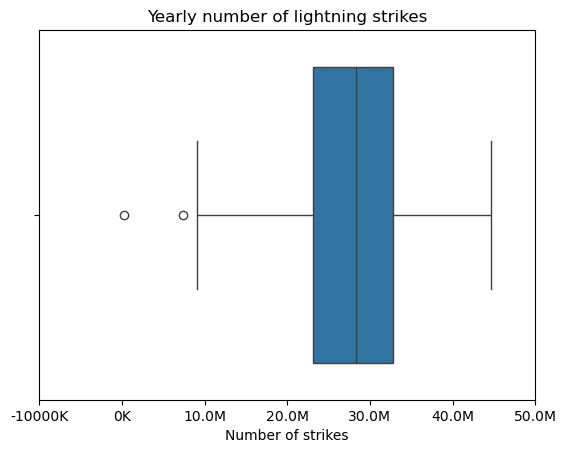

In [41]:
# Create boxplot
box = sns.boxplot(x=df['number_of_strikes'])
g = plt.gca()
ticks = g.get_xticks()
labels = [readable_numbers(x) for x in ticks]
g.set_xticks(ticks)
g.set_xticklabels(labels)
plt.xlabel('Number of strikes')
plt.title('Yearly number of lightning strikes');

The points to the left of the left whisker are outliers. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.

In [42]:
# Calculate 25th percentile of annual strikes
percentile25 = df['number_of_strikes'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df['number_of_strikes'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: '+ readable_numbers(lower_limit))

Lower limit is: 8.6M


In [43]:
# Isolate outliers on low end
df[df['number_of_strikes'] < lower_limit]

year  number_of_strikes number_of_strikes_readable
1   2019             209166                       209K
33  1987            7378836                       7.4M

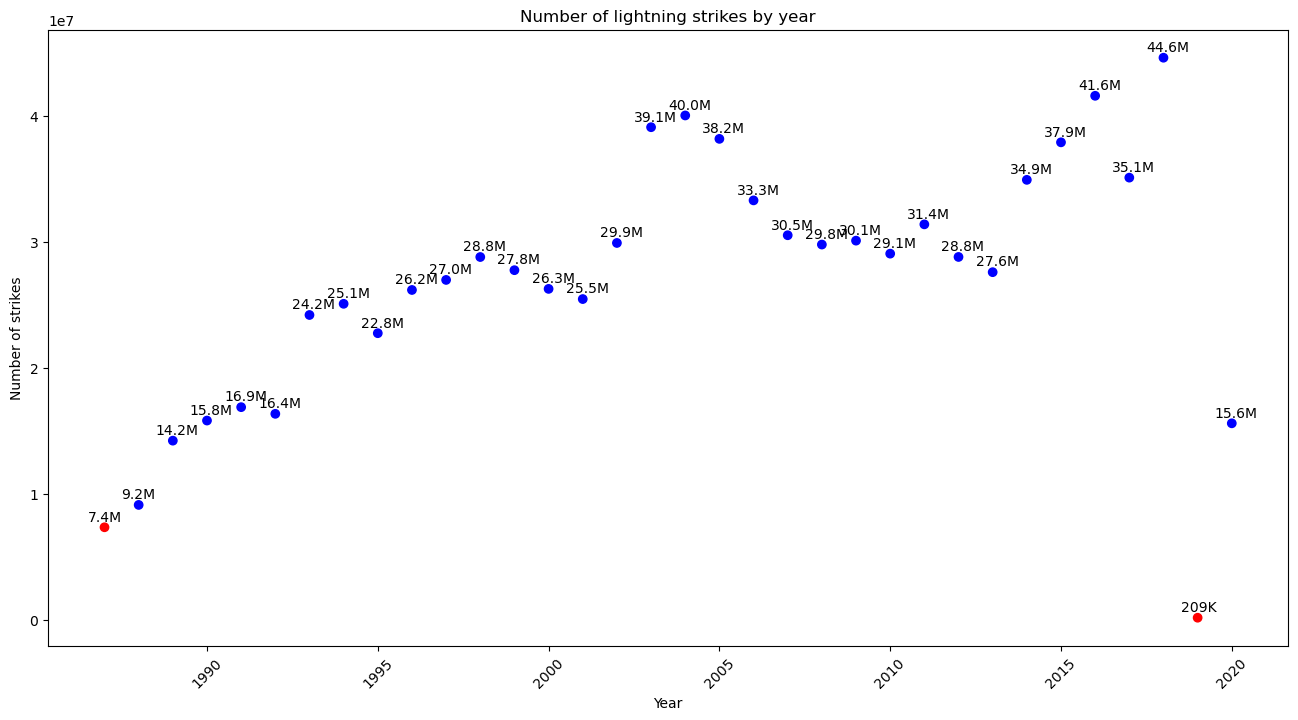

In [44]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i]-0.5, y[i]+500000, s=readable_numbers(y[i]))

colors = np.where(df['number_of_strikes'] < lower_limit, 'r', 'b')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['year'], df['number_of_strikes'],c=colors)
ax.set_xlabel('Year')
ax.set_ylabel('Number of strikes')
ax.set_title('Number of lightning strikes by year')
addlabels(df['year'], df['number_of_strikes'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

#### Investigating the outliers 2019 and 1987

In [45]:
# Read in the 2019 dataset
df_2019 = pd.read_csv('noaa_lightning_outliers_dataset_2019.csv')
df_2019.head()

date  number_of_strikes  center_point_geom
0  2019-12-01                  1  POINT(-79.7 35.3)
1  2019-12-01                  1  POINT(-84.7 39.3)
2  2019-12-01                  1  POINT(-83.4 38.9)
3  2019-12-01                  1  POINT(-71.5 35.2)
4  2019-12-01                  1  POINT(-87.8 41.6)

In [46]:
# Convert `date` column to `datetime`
df_2019['date']= pd.to_datetime(df_2019['date'])

# Create 2 new columns
df_2019['month'] = df_2019['date'].dt.month
df_2019['month_txt'] = df_2019['date'].dt.month_name().str.slice(stop=3)

# Group by `month` and `month_txt`, sum it, and sort
df_2019_by_month = (
    df_2019
      .groupby(['month','month_txt'], as_index=False)
      .agg(number_of_strikes=('number_of_strikes', 'sum'))
      .sort_values('month')
)
df_2019_by_month

month month_txt  number_of_strikes
0     12       Dec             209166

2019 appears to have data only for the month of December. The likelihood of there not being any lightning from January to November 2019 is ~0. This appears to be a case of missing data or data entry error. Thus, we should exclude 2019 from any future analysis or modeling, or contact the database owner for clarification.

In [47]:
# Read in the 1987 dataset
df_1987 = pd.read_csv('noaa_lightning_outliers_dataset_1987.csv')
df_1987.head()

date  number_of_strikes  center_point_geom
0  1987-01-01                 21    POINT(-80.7 26)
1  1987-01-04                 23  POINT(-83.2 28.3)
2  1987-01-05                 40  POINT(-78.9 31.3)
3  1987-01-05                 20  POINT(-79.2 31.4)
4  1987-01-05                 21  POINT(-80.1 31.4)

In [48]:
# Convert `date` column to `datetime`
df_1987['date'] = pd.to_datetime(df_1987['date'])

# Create 2 new columns
df_1987['month'] = df_1987['date'].dt.month
df_1987['month_txt'] = df_1987['date'].dt.month_name().str.slice(stop=3)

# Group by `month` and `month_txt`, sum it, and sort
df_1987_by_month = (
    df_1987
      .groupby(['month','month_txt'], as_index=False)
      .agg(number_of_strikes=('number_of_strikes', 'sum'))  # use string 'sum' (no FutureWarning)
      .sort_values('month')
)
df_1987_by_month

month month_txt  number_of_strikes
0       1       Jan              23044
1       2       Feb              61020
2       3       Mar             117877
3       4       Apr             157890
4       5       May             700910
5       6       Jun            1064166
6       7       Jul            2077619
7       8       Aug            2001899
8       9       Sep             869833
9      10       Oct             105627
10     11       Nov             155290
11     12       Dec              43661

1987 has data for every month of the year. Hence, this outlier should be treated differently than 2019, which is missing data. If we plan to use this dataset for future modeling, it is important to address this outlier. One possible approach is to winsorize it at the 5th percentile, effectively capping its extreme low values without removing the year entirely.

But for now, let's remove it and re-run the mean and median after removing both outliers (2019 and 1987).

In [49]:
# Create new df that removes outliers
df_without_outliers = df[df['number_of_strikes'] >= lower_limit]

# Recalculate mean and median values on data without outliers
print("Mean:" + readable_numbers(np.mean(df_without_outliers['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df_without_outliers['number_of_strikes'])))

Mean:28.2M
Median:28.8M


Both the mean and the median changed, but the mean much more so. It is clear that outlier values can affect the distributions of the data and the conclusions that can be drawn from them. Our final takeaway from this section on outliers is that outliers significantly affect the dataset's mean, but do not significantly affect the median. 

## 4. Label encoding

### Objective

We will be examining monthly lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2016&ndash;2018. The dataset includes three columns:  

|date|number_of_strikes|center_point_geom|
|---|---|---|  

The objective is to assign the monthly number of strikes to the following categories: mild, scattered, heavy, or severe. Then we will create a heatmap of the three years so we can get a high-level understanding of monthly lightning severity from a simple diagram.   

In [50]:
# Read in the dataset
df = pd.read_csv('noaa_lightning_label_encoding_dataset.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


#### Create a categorical variable `strike_level`  

In [52]:
# Convert `date` column to `datetime`
df['date'] = pd.to_datetime(df['date'])

# Create new `month` column
df['month'] = df['date'].dt.month_name().str.slice(stop=3)

In [53]:
df.head()

date  number_of_strikes   center_point_geom month
0 2016-08-05                 16  POINT(-101.5 24.7)   Aug
1 2016-08-05                 16     POINT(-85 34.3)   Aug
2 2016-08-05                 16     POINT(-89 41.4)   Aug
3 2016-08-05                 16   POINT(-89.8 30.7)   Aug
4 2016-08-05                 16   POINT(-86.2 37.9)   Aug

Next, we'll encode the months as categorical information. This allows us to specifically designate them as categories that adhere to a specific order, which is helpful when we plot them later. We'll also create a new `year` column. Then we'll group the data by year and month, sum the remaining columns, and assign the results to a new dataframe.

In [54]:
# Create categorical designations
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Encode `month` column as categoricals 
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# Create `year` column by extracting the year info from the datetime object
df['year'] = df['date'].dt.strftime('%Y')

# Create a new df of month, year, total strikes
df_by_month = (
    df.groupby(['year', 'month'], observed=True, as_index=False)
      .sum(numeric_only=True)
      .sort_values(['year','month'])
)
df_by_month.head()

year month  number_of_strikes
0  2016   Jan             313595
1  2016   Feb             312676
2  2016   Mar            2057527
3  2016   Apr            2636427
4  2016   May            5800500

Now we'll create a new column called `strike_level` that contains a categorical variable representing the lightning strikes for each month as mild, scattered, heavy, or severe.

In [55]:
# Create a new column that categorizes number_of_strikes into 1 of 4 categories
df_by_month['strike_level'] = pd.qcut(
    df_by_month['number_of_strikes'],
    4,
    labels = ['Mild', 'Scattered', 'Heavy', 'Severe']
)
df_by_month.head()

year month  number_of_strikes strike_level
0  2016   Jan             313595         Mild
1  2016   Feb             312676         Mild
2  2016   Mar            2057527    Scattered
3  2016   Apr            2636427        Heavy
4  2016   May            5800500       Severe

#### Encode `strike_level` into numerical values

In [56]:
# Create new column representing numerical value of strike level
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month.head()

year month  number_of_strikes strike_level  strike_level_code
0  2016   Jan             313595         Mild                  0
1  2016   Feb             312676         Mild                  0
2  2016   Mar            2057527    Scattered                  1
3  2016   Apr            2636427        Heavy                  2
4  2016   May            5800500       Severe                  3

We can also create binary "dummy" variables from the `strike_level` column. This is a useful tool if we'd like to pass the categorical variable into a model. To do this, we could use the function `pd.get_dummies()`.

In [57]:
pd.get_dummies(df_by_month['strike_level'], dtype=int)

Mild  Scattered  Heavy  Severe
0      1          0      0       0
1      1          0      0       0
2      0          1      0       0
3      0          0      1       0
4      0          0      0       1
5      0          0      0       1
6      0          0      0       1
7      0          0      0       1
8      0          0      1       0
9      0          1      0       0
10     1          0      0       0
11     1          0      0       0
12     0          1      0       0
13     1          0      0       0
14     0          1      0       0
15     0          0      1       0
16     0          0      1       0
17     0          0      1       0
18     0          0      0       1
19     0          0      0       1
20     0          0      1       0
21     0          1      0       0
22     1          0      0       0
23     1          0      0       0
24     0          1      0       0
25     0          0      1       0
26     0          1      0       0
27     0          1      0       0
28     0          0      1       0
29     0          0      0       1
30     0          0      0       1
31     0          0      0       1
32     0          0      1       0
33     0          1      0       0
34     1          0      0       0
35     1          0      0       0

#### Create a heatmap of number of strikes per month

In [58]:
# Create new df that pivots the data
df_by_month_plot = df_by_month.pivot(index='year', columns='month', values='strike_level_code')
df_by_month_plot.head()

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
2016     0    0    1    2    3    3    3    3    2    1    0    0
2017     1    0    1    2    2    2    3    3    2    1    0    0
2018     1    2    1    1    2    3    3    3    2    1    0    0

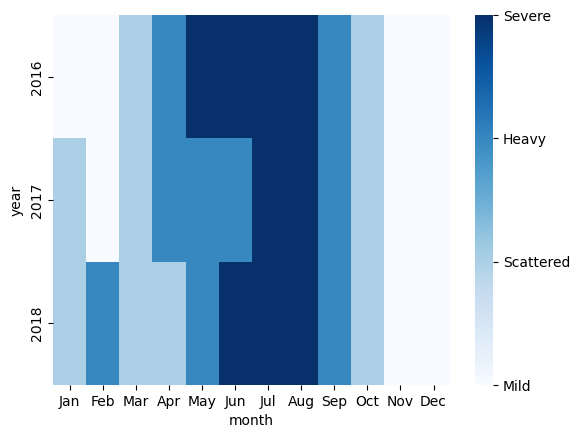

In [59]:
ax = sns.heatmap(df_by_month_plot, cmap = 'Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(['Mild', 'Scattered', 'Heavy', 'Severe'])
plt.show()

The heatmap indicates that for all three years, the most lightning strikes occurred during the summer months. A heatmap is an easily digestable way to understand a lot of data in a single graphic.  

## 5. Input validation

### Objective

We will be examining monthly lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2018. The dataset includes five columns:  

|date|number_of_strikes|center_point_geom|longitude|latitude|
|---|---|---|---|---|  

The objective is to inspect the data and validate the quality of its contents. We will check for:
  
* Null values
* Missing dates
* A plausible range of daily lightning strikes in a location
* A geographical range that aligns with expectation

In [60]:
# Read in the first dataset
df = pd.read_csv('noaa_lightning_input_validation_dataset1.csv')
df.head()

date  number_of_strikes center_point_geom  longitude  latitude
0  2018-01-03                194     POINT(-75 27)      -75.0      27.0
1  2018-01-03                 41   POINT(-78.4 29)      -78.4      29.0
2  2018-01-03                 33   POINT(-73.9 27)      -73.9      27.0
3  2018-01-03                 38   POINT(-73.8 27)      -73.8      27.0
4  2018-01-03                 92     POINT(-79 28)      -79.0      28.0

In [61]:
print(df.dtypes)

date                  object
number_of_strikes      int64
center_point_geom     object
longitude            float64
latitude             float64
dtype: object


The `date` column is currently a string. Let's parse it into a `datetime` column.

In [62]:
# Convert `date` column to `datetime`
df['date'] = pd.to_datetime(df['date'])

Now we'll do some data validation. We begin by counting the number of missing values in each column.

In [63]:
df.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
longitude            0
latitude             0
dtype: int64

In [64]:
df.describe(include = 'all')

date  number_of_strikes  center_point_geom  \
count                         3401012       3.401012e+06            3401012   
unique                            NaN                NaN             170855   
top                               NaN                NaN  POINT(-81.5 22.5)   
freq                              NaN                NaN                108   
mean    2018-07-13 03:32:02.018504960       1.311403e+01                NaN   
min               2018-01-01 00:00:00       1.000000e+00                NaN   
25%               2018-06-04 00:00:00       2.000000e+00                NaN   
50%               2018-07-18 00:00:00       4.000000e+00                NaN   
75%               2018-08-24 00:00:00       1.200000e+01                NaN   
max               2018-12-31 00:00:00       2.211000e+03                NaN   
std                               NaN       3.212099e+01                NaN   

           longitude      latitude  
count   3.401012e+06  3.401012e+06  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean   -9.081778e+01  3.374688e+01  
min    -1.418000e+02  1.660000e+01  
25%    -1.008000e+02  2.760000e+01  
50%    -9.070000e+01  3.350000e+01  
75%    -8.130000e+01  3.970000e+01  
max    -4.320000e+01  5.170000e+01  
std     1.296593e+01  7.838555e+00

Notice that the number of unique dates in the `date` column is 357. This means that eight days of 2018 are missing from the data, because 2018 had 365 days.

#### Validate `date` column

In [65]:
# Create datetime index of every date in 2018
full_date_range = pd.date_range(start='2018-01-01', end='2018-12-31')

# Determine which values are in `full_date_range` but not in `df['date']`
full_date_range.difference(df['date'])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

We knew that the data was missing eight dates, but now we know which specific dates they are. 

#### Validate `number_of_strikes` column

<Axes: ylabel='number_of_strikes'>

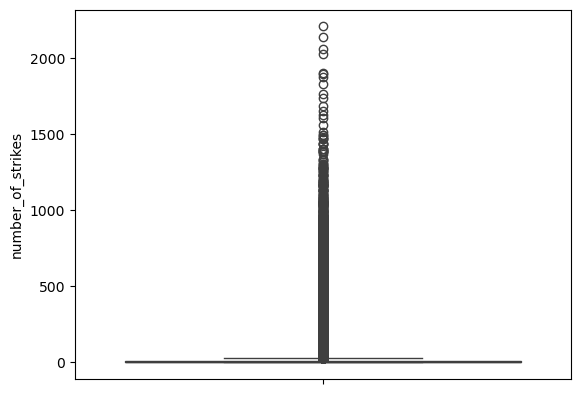

In [66]:
sns.boxplot(y = df['number_of_strikes'])

This is not a very useful visualization because the box of the interquartile range is squished at the very bottom. This is because the upper outliers are taking up all the space. Let's do it again, only this time we'll set `showfliers=False` so outliers are not included. 

<Axes: ylabel='number_of_strikes'>

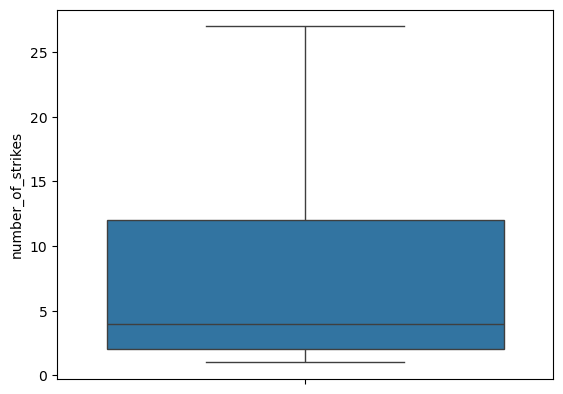

In [67]:
sns.boxplot(y = df['number_of_strikes'], showfliers=False)

Much better! The interquartile range is approximately 2&ndash;12 strikes. But we know from the previous boxplot that there are many outlier days that have hundreds or even thousands of strikes. This exercise just helped us make sure that most of the dates in our data had plausible values for number of strikes. 

#### Validate `latitude` and `longitude` columns

In [68]:
# Create new df only of unique latitude and longitude combinations
df_points = df[['latitude', 'longitude']].drop_duplicates() 
df_points.head()

latitude  longitude
0      27.0      -75.0
1      29.0      -78.4
2      27.0      -73.9
3      27.0      -73.8
4      28.0      -79.0

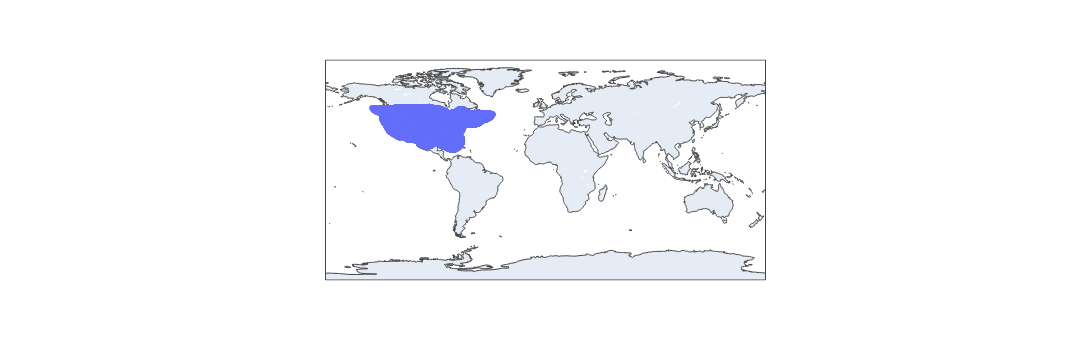

In [69]:
fig = px.scatter_geo(df_points, lat = 'latitude', lon = 'longitude')
fig.show()

The plot indicates that the lightning strikes occurred primarily in the United States, but there were also many strikes in southern Canada, Mexico, and the Caribbean. We can click and move the map, and also zoom in for better resolution of the strike points.

# END